***

# Example Notebook - Artist definitions

***

In this notebook the customization of artists is shown in a couple of examples.

1. Simple artist
1. Artist with shade effect

In [1]:
import matplotlib.pyplot as plt
import sys

try:
    from secstructartist.artists import (
        SecStructArtist, 
        ElementArtist, 
        primitives as prim,
    )
except ImportError:
    sys.path.append('../src')
    from secstructartist.artists import (
        SecStructArtist, 
        ElementArtist, 
        primitives as prim,
    )

***

## Simple artist

An artist for the three most common secondary structure elements:
* H - Helix
* S - Sheet
* L - Loop

A similar artist is available using the `pymol` keyword:

```python
    # Secondary structure string
    secstruct_str = (
        "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
        "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
        "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
    )

    # Draw figure
    draw_secondary_structure(secstruct_str, artist='pymol')
```

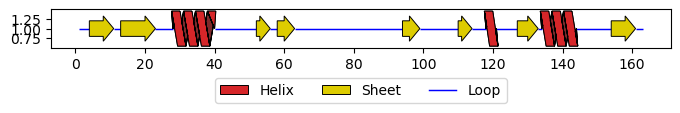

In [2]:
#
# --- Secondary structure string
#
secstruct_str = (
    "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
    "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
    "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
)

#
# --- Definition of the Element artists
#
element_H = ElementArtist([
        # Light red helix
        prim.HelixPrimitive(
            fillcolor = [0.84, 0.15, 0.16], 
            linecolor = [0., 0., 0.],
            height_scalar=.9, 
            ribbon_period = 3.6,
            ribbon_width = 2.4,
            fill_inner_ribbon = False,
        ),
        # Darker red helix for inner shade (`fill_inner_ribbon = True`)
        prim.HelixPrimitive( #
            fillcolor = [.49, .16, .17],
            linecolor = [0., 0., 0.], 
            height_scalar=.9, 
            ribbon_period = 3.6,
            ribbon_width = 2.4,
            fill_inner_ribbon = True,
            zorder_offset = -.1,
        )
    ], 'Helix'
)
element_S = ElementArtist([
        # Yellow arrow
        prim.ArrowPrimitive(
            fillcolor = '#ddcc00',
            linecolor = 'k', 
            height_scalar = .65,
            height_scalar2 = .4,
            arrow_tip_length = 3
        )
    ], 'Sheet'
)
element_L = ElementArtist([
        # Blue line
        prim.LinePrimitive(
            linecolor = 'blue',
            linewidth_scalar = 1.5
        )
    ], 'Loop'
)

#
# --- Artist setup
#
my_mapping = {
    'H': element_H, 
    'S': element_S, 
    'L': element_L,
    '-': element_L, # an alias for loops
}
my_artist = SecStructArtist(my_mapping, linewidth=.7, zorder=5)

#
# --- Draw
#
fig, ax = plt.subplots(figsize=(8,.5), subplot_kw={
    'projection': 'secstruct'
})
ax.draw_secondary_structure(secstruct_str, artist=my_artist)
ax.legend(
    loc='upper center', bbox_to_anchor=(.5, -.6), 
    ncols = 3,
)

#
# --- Optionally save the artist
#
# my_artist.to_config('./my_artist.yaml')

***

## Artist with shade effect

An artist for the three most common secondary structure elements:
* H - Helix
* S - Sheet
* L - Loop

A similar artist is available using the `pymol` keyword:

```python
    # Secondary structure string
    secstruct_str = (
        "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
        "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
        "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
    )

    # Draw figure
    draw_secondary_structure(secstruct_str, artist='pymol')
```

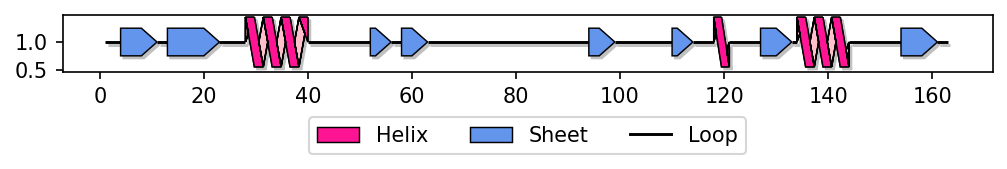

In [3]:
#
# --- Secondary structure string
#
secstruct_str = (
    "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
    "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
    "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
)

#
# --- Definition of the Element artists
#
shade_offset = (.5, -.05)
shade_color = 'silver'

element_H = ElementArtist([
        prim.HelixPrimitive( # Red helix
            fillcolor = 'deeppink', 
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive( # Lighter inner helix
            fillcolor = 'pink',
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = True,
            zorder_offset = -.1,
        ),
        prim.HelixPrimitive( # Shade for the helix
            xy_offset = shade_offset,
            fillcolor = shade_color,
            linecolor = shade_color,
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = True,
            zorder_offset = -.2,
        )
    ], 'Helix'
)
element_S = ElementArtist([
        prim.ArrowPrimitive( # Blue arrow
            fillcolor = 'cornflowerblue',
            height_scalar = .5,
            height_scalar2 = .5,
            arrow_tip_length = 3
        ),
        prim.ArrowPrimitive( # Shade for arrows
            xy_offset = shade_offset,
            fillcolor = shade_color,
            linecolor = shade_color,
            height_scalar = .5,
            height_scalar2 = .5,
            arrow_tip_length = 3,
            zorder_offset = -.2,
        )
    ], 'Sheet'
)
element_L = ElementArtist([
        prim.LinePrimitive( # Simple line
            linecolor = 'black',
            linewidth_scalar = 2
        ),
        prim.LinePrimitive( # Shade for line
            xy_offset = shade_offset,
            linecolor = shade_color,
            linewidth_scalar = 2
        )
    ], 'Loop'
)

#
# --- Artist setup
#
my_mapping = {
    'H': element_H, 
    'S': element_S, 
    'L': element_L,
    '-': element_L, # an alias for loops
}
my_artist = SecStructArtist(my_mapping, linewidth=.7, zorder=5)

#
# --- Draw
#
fig, ax = plt.subplots(figsize=(8,.5), dpi=150, subplot_kw={
    'projection': 'secstruct'
})
ax.draw_secondary_structure(secstruct_str, artist=my_artist)
ax.legend(
    loc='upper center', bbox_to_anchor=(.5, -.6), 
    ncols = 3,
)

#
# --- Optionally save the artist
#
# my_artist.to_config('./my_artist.yaml')